In [1]:
import numpy as np
import pandas as pd

In [2]:
#导入数据集
url1 = 'G:\DownLoad\data\hotel.csv'
df_hotel = pd.read_csv(url1)

url2 = 'G:\DownLoad\data\customer.csv'
df_customer = pd.read_csv(url2)

In [3]:
#将df_hotel的'is_business'中的'TRUE'和'FALSE'分别转换为0和1
df_hotel['is_business'] = df_hotel['is_business'].replace('TRUE',0)
df_hotel['is_business'] = df_hotel['is_business'].replace('FALSE',1)
df_hotel['is_business'] = df_hotel['is_business'].astype(np.int8)

#将df_customer的'sex'中的'man'和'woman'分别转换为0和1
df_customer['sex'] = df_customer['sex'].replace('man',0)
df_customer['sex'] = df_customer['sex'].replace('woman',1)
df_customer['sex'] = df_customer['sex'].astype(np.int8)

In [4]:
#删除df_hotel不需要的'hotel_id'、'big_area_name'、'small_area_name'三列
df_hotel.drop(['hotel_id','big_area_name','small_area_name'], axis=1)
#删除df_customer不需要的'customer_id'
df_customer.drop('customer_id', axis=1)

,age,sex,home_latitude,home_longitude
0,41,0,35.092193,136.512347
1,38,0,35.325076,139.410551
2,49,1,35.120543,136.511179
3,43,0,43.034868,141.240314
4,31,0,35.102661,136.523797
...,...,...,...,...
995,44,0,34.465648,135.373787
996,35,0,35.345372,139.413754
997,32,1,43.062267,141.272126
998,48,1,38.172800,140.464198


In [5]:
#观察df_hotel的数据统计量
print('df_hotel的数据统计量：')
print(df_hotel.describe(),'\n')

#观察df_customer的数据统计量
print('df_customer的数据统计量：')
print(df_customer.describe(),'\n')

df_hotel的数据统计量：
         base_price  hotel_latitude  hotel_longitude  is_business
count    300.000000      300.000000       300.000000   300.000000
mean   20197.666667       36.672407       138.437448     0.456667
std    15270.012185        2.475990         3.450787     0.498951
min     3500.000000       33.491110       130.529900     0.000000
25%     9300.000000       35.285222       136.985115     0.000000
50%    15600.000000       35.716535       139.800617     0.000000
75%    25125.000000       38.328767       140.793411     1.000000
max    74800.000000       43.165512       141.515930     1.000000 

df_customer的数据统计量：
              age          sex  home_latitude  home_longitude
count  1000.00000  1000.000000    1000.000000     1000.000000
mean     51.27500     0.482000      36.301492      137.101549
std      14.76548     0.499926       3.024908        3.590634
min      21.00000     0.000000      33.264641      130.290768
25%      39.00000     0.000000      34.444472      135.3739

In [6]:
#查找缺失值
print(df_customer.isnull().any(),'\n')
print(df_hotel.isnull().any(),'\n')
#全都为false，说明没有缺失值

customer_id       False
age               False
sex               False
home_latitude     False
home_longitude    False
dtype: bool 

hotel_id           False
base_price         False
big_area_name      False
small_area_name    False
hotel_latitude     False
hotel_longitude    False
is_business        False
dtype: bool 



In [7]:
#标准差检测异常值

#酒店价格
xbar_price = df_hotel['base_price'].mean()
xstd_price = df_hotel['base_price'].std()

print('酒店价格标准差法异常值上限检测：\n',any(df_hotel['base_price'] > xbar_price + 2.5*xstd_price))
print('酒店价格标准差法异常值下限检测：\n',any(df_hotel['base_price'] < xbar_price - 2.5*xstd_price))

酒店价格标准差法异常值上限检测：
 True
酒店价格标准差法异常值下限检测：
 False


In [8]:
#显示异常值
from scipy.stats import zscore

In [9]:
#酒店价格异常值
print('酒店价格异常值有：')
df_hotel['base_price'][np.abs(zscore(df_hotel['base_price']))>3]

酒店价格异常值有：


60     74800
123    66600
133    67600
176    70100
222    68500
246    71200
268    67600
Name: base_price, dtype: int64

In [10]:
#创建一个新的数据集，用面积area表示latitude和longitude
hotel = pd.DataFrame()

hotel['price'] = df_hotel['base_price'].copy()
hotel['area'] = df_hotel['hotel_latitude']*df_hotel['hotel_longitude']

hotel.head(4)

,price,area
0,26100,6094.127243
1,26400,4997.982069
2,41300,4833.171888
3,5200,5410.957541


In [11]:
#数据规整化
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler

In [12]:
#Max-Min标准化方法
minmax_scaler = MinMaxScaler()
hotel_scale_1 = minmax_scaler.fit_transform(hotel)
hotel_scale_1_df = pd.DataFrame(hotel_scale_1)
hotel_scale_1_df.head()

,0,1
0,0.316971,0.991852
1,0.321178,0.360605
2,0.530154,0.265694
3,0.023843,0.598429
4,0.140252,0.007938


In [13]:
#Z-Score标准化
zscore_scaler = StandardScaler()
hotel_scale_3 = zscore_scaler.fit_transform(hotel)
hotel_scale_3_df = pd.DataFrame(hotel_scale_3)
hotel_scale_3_df.head()

,0,1
0,0.387177,2.317638
1,0.406856,-0.193664
2,1.384255,-0.571249
3,-0.983806,0.752476
4,-0.439349,-1.596685


In [14]:
#MaxAbs标准化
maxabsscaler = MaxAbsScaler()
hotel_scale_5 = maxabsscaler.fit_transform(hotel)
hotel_scale_5_df = pd.DataFrame(hotel_scale_5)
hotel_scale_5_df.head()

,0,1
0,0.348930,0.997684
1,0.352941,0.818231
2,0.552139,0.791250
3,0.069519,0.885840
4,0.180481,0.717974


In [15]:
#RobustScaler标准化
robustscaler = RobustScaler()
hotel_scale_6 = robustscaler.fit_transform(hotel)
hotel_scale_6_df = pd.DataFrame(hotel_scale_6)
hotel_scale_6_df.head()

,0,1
0,0.663507,1.960282
1,0.682464,0.001271
2,1.624013,-0.293275
3,-0.657188,0.739333
4,-0.132701,-1.093196


In [16]:
'''
标准化方法选择:
    1.如果要做中心化处理，并且对数据分布有正态要求，那么使用Z-Score方法
    2.如果要进行0-1标准化或者将要指定标准化后的数据分布范围，那么使用Max-Min标准化或MaxAbs标准化方式是比较好的方法，尤其是前者。
    3.如果要对稀疏数据进行处理，Max-Min标准化或者MaxAbs标准化是理想方法
    4.如果要最大限度保留数据集中的异常，那么使用RobustScaler方法更好
'''

'\n标准化方法选择:\n    1.如果要做中心化处理，并且对数据分布有正态要求，那么使用Z-Score方法\n    2.如果要进行0-1标准化或者将要指定标准化后的数据分布范围，那么使用Max-Min标准化或MaxAbs标准化方式是比较好的方法，尤其是前者。\n    3.如果要对稀疏数据进行处理，Max-Min标准化或者MaxAbs标准化是理想方法\n    4.如果要最大限度保留数据集中的异常，那么使用RobustScaler方法更好\n'

Text(0, 0.5, 'area')

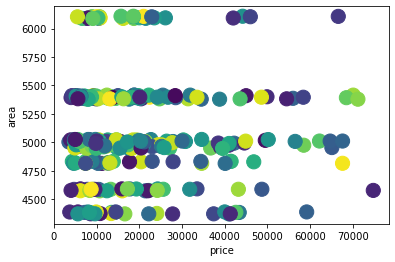

In [17]:
colors = np.random.rand(len(hotel['price']))  # 颜色数组
plt.scatter(hotel['price'], hotel['area'], s=200, c=colors)  # 画散点图，
plt.xlabel('price')  # 横坐标轴标题
plt.ylabel('area')  # 纵坐标轴标题

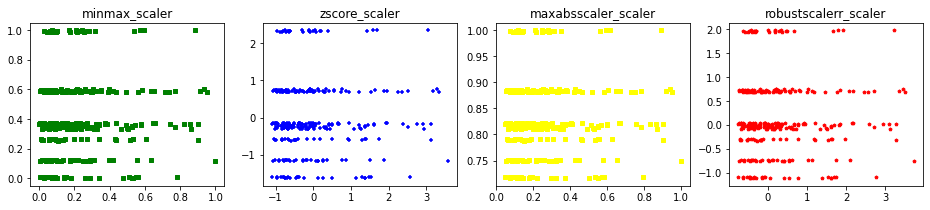

In [18]:
#标准化后数据可视化
data_list = [hotel_scale_1, hotel_scale_3, hotel_scale_5, hotel_scale_6]  # 创建数据集列表
color_list = ['green', 'blue', 'yellow', 'red']  # 创建颜色列表
merker_list = [',', '+', 's', 'p']  # 创建样式列表
title_list = ['minmax_scaler', 'zscore_scaler', 'maxabsscaler_scaler','robustscalerr_scaler']  # 创建标题列表
              
plt.figure(figsize=(16, 3))
for i, data_single in enumerate(data_list):  # 循环得到索引和每个数值
    plt.subplot(1, 4, i + 1)  # 确定子网格
    plt.scatter(data_single[:, :-1], data_single[:, -1], s=10, marker=merker_list[i],c=color_list[i])  # 自网格展示散点图
    plt.title(title_list[i])  # 设置自网格标题

In [21]:
#PCA降维，将二维的hotel降维至一维

from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca.fit(hotel_scale_3_df)
new_hotel = pca.fit_transform(hotel_scale_3)
print(pca.explained_variance_ratio_)
print(new_hotel)
#重构
reconMat = pca.inverse_transform(new_hotel)

[0.50412153]
[[ 1.91259302e+00]
 [ 1.50749721e-01]
 [ 5.74882223e-01]
 [-1.63575091e-01]
 [-1.43969317e+00]
 [ 1.25487638e+00]
 [ 4.54658452e-01]
 [-5.45725157e-01]
 [ 1.00639443e+00]
 [-7.69521395e-01]
 [-3.52271103e-01]
 [-1.16172899e-01]
 [-1.52105136e+00]
 [ 1.05111280e+00]
 [-1.14108177e+00]
 [ 2.31746872e-02]
 [-4.00720262e-01]
 [-7.98613534e-01]
 [-5.24659329e-01]
 [-8.04361217e-02]
 [-8.49950353e-01]
 [ 1.21405639e+00]
 [ 1.87560991e+00]
 [-1.15445112e+00]
 [-5.94955798e-01]
 [ 1.89362633e+00]
 [ 1.56088429e+00]
 [-8.63635041e-01]
 [-1.18594463e-02]
 [-7.22786022e-01]
 [ 3.61570654e-01]
 [-3.78093794e-01]
 [-9.91650846e-01]
 [-7.33489231e-01]
 [-9.01823272e-01]
 [ 3.69947367e-01]
 [ 3.71145851e-02]
 [ 2.15460613e+00]
 [-1.13081690e+00]
 [ 1.13104280e+00]
 [-8.53667952e-01]
 [-5.61551774e-01]
 [-3.05372549e-01]
 [-9.22322953e-01]
 [ 1.18112544e+00]
 [-1.77513840e-01]
 [-5.72622332e-01]
 [ 1.68164424e+00]
 [-4.22263578e-01]
 [-1.89651785e-01]
 [ 1.99602241e-01]
 [ 1.06483180e-01]

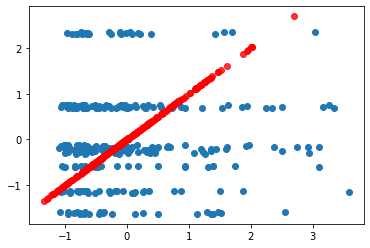

In [23]:
plt.scatter(hotel_scale_3[:, :-1], hotel_scale_3[:, -1])
plt.scatter(reconMat[:,0], reconMat[:,1], alpha=0.8,color = 'red')